Import Python 2 libraries

In [1]:
import pandas as pd
from sklearn import neural_network, linear_model, cross_validation,metrics,cluster
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pp

C:\Users\Asus\AppData\Roaming\Python\Python35\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Read datafiles

In [2]:
APPLE = pd.read_csv('Data/AAPL.csv')
ADOBE = pd.read_csv('Data/ADBE.csv')
GOOGLE = pd.read_csv('Data/GOOGL.csv')
MICROSOFT = pd.read_csv('Data/MSFT.csv')
NVIDIA = pd.read_csv('Data/NVDA.csv')
SONY = pd.read_csv('Data/SNE.csv')
Globals = ["APPLE", "ADOBE", "GOOGLE", "MICROSOFT", "NVIDIA", "SONY"]

Separate files by years

In [3]:
APPLE11 = pd.read_csv('Data/2011/AAPL.csv')
ADOBE11 = pd.read_csv('Data/2011/ADBE.csv')
GOOGLE11 = pd.read_csv('Data/2011/GOOGL.csv')
MICROSOFT11 = pd.read_csv('Data/2011/MSFT.csv')
NVIDIA11 = pd.read_csv('Data/2011/NVDA.csv')
SONY11 = pd.read_csv('Data/2011/SNE.csv')
dat11 = ["APPLE11", "ADOBE11", "GOOGLE11", "MICROSOFT11", "NVIDIA11", "SONY11"]

APPLE12 = pd.read_csv('Data/2012/AAPL.csv')
ADOBE12 = pd.read_csv('Data/2012/ADBE.csv')
GOOGLE12 = pd.read_csv('Data/2012/GOOGL.csv')
MICROSOFT12 = pd.read_csv('Data/2012/MSFT.csv')
NVIDIA12 = pd.read_csv('Data/2012/NVDA.csv')
SONY12 = pd.read_csv('Data/2012/SNE.csv')
dat12 = ["APPLE12", "ADOBE12", "GOOGLE12", "MICROSOFT12", "NVIDIA12", "SONY12"]

APPLE13 = pd.read_csv('Data/2013/AAPL.csv')
ADOBE13 = pd.read_csv('Data/2013/ADBE.csv')
GOOGLE13 = pd.read_csv('Data/2013/GOOGL.csv')
MICROSOFT13 = pd.read_csv('Data/2013/MSFT.csv')
NVIDIA13 = pd.read_csv('Data/2013/NVDA.csv')
SONY13 = pd.read_csv('Data/2013/SNE.csv')
dat13 = ["APPLE13", "ADOBE13", "GOOGLE13", "MICROSOFT13", "NVIDIA13", "SONY13"]

APPLE14 = pd.read_csv('Data/2014/AAPL.csv')
ADOBE14 = pd.read_csv('Data/2014/ADBE.csv')
GOOGLE14 = pd.read_csv('Data/2014/GOOGL.csv')
MICROSOFT14 = pd.read_csv('Data/2014/MSFT.csv')
NVIDIA14 = pd.read_csv('Data/2014/NVDA.csv')
SONY14 = pd.read_csv('Data/2014/SNE.csv')
dat14 = ["APPLE14", "ADOBE14", "GOOGLE14", "MICROSOFT14", "NVIDIA14", "SONY14"]

APPLE15 = pd.read_csv('Data/2015/AAPL.csv')
ADOBE15 = pd.read_csv('Data/2015/ADBE.csv')
GOOGLE15 = pd.read_csv('Data/2015/GOOGL.csv')
MICROSOFT15 = pd.read_csv('Data/2015/MSFT.csv')
NVIDIA15 = pd.read_csv('Data/2015/NVDA.csv')
SONY15 = pd.read_csv('Data/2015/SNE.csv')
dat15 = ["APPLE15", "ADOBE15", "GOOGLE15", "MICROSOFT15", "NVIDIA15", "SONY15"]

APPLE16 = pd.read_csv('Data/2016/AAPL.csv')
ADOBE16 = pd.read_csv('Data/2016/ADBE.csv')
GOOGLE16 = pd.read_csv('Data/2016/GOOGL.csv')
MICROSOFT16 = pd.read_csv('Data/2016/MSFT.csv')
NVIDIA16 = pd.read_csv('Data/2016/NVDA.csv')
SONY16 = pd.read_csv('Data/2016/SNE.csv')
dat16 = ["APPLE16", "ADOBE16", "GOOGLE16", "MICROSOFT16", "NVIDIA16", "SONY16"]


Function draws grafic of string:s from dataframe string:name

In [4]:
def draw(name, s):
    pp.title(name)
    df = eval(name)
    pp.xlabel("date")
    pp.ylabel(s)
    pp.plot(pd.to_datetime(df["date"]), df[s])
    pp.show()


Drawing part

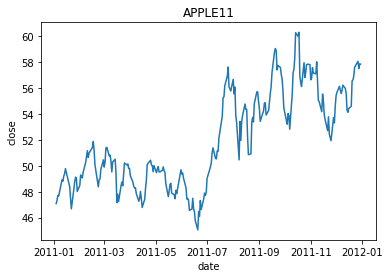

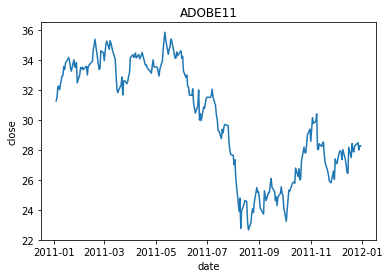

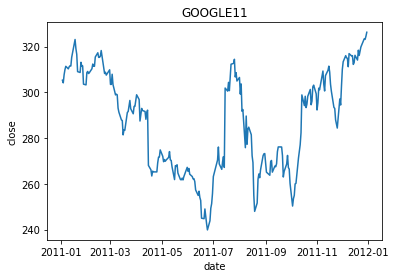

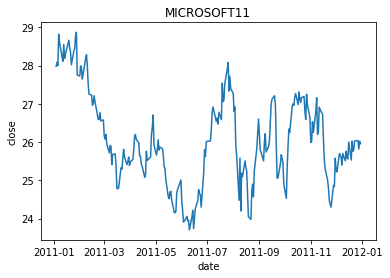

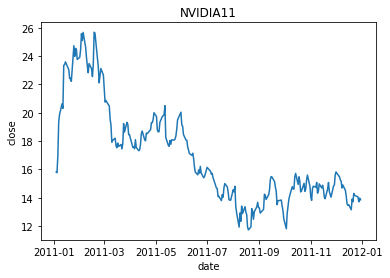

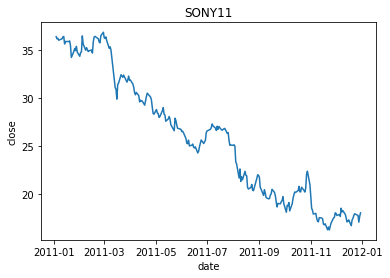

In [5]:
for name in dat11:
    draw(name, "close")

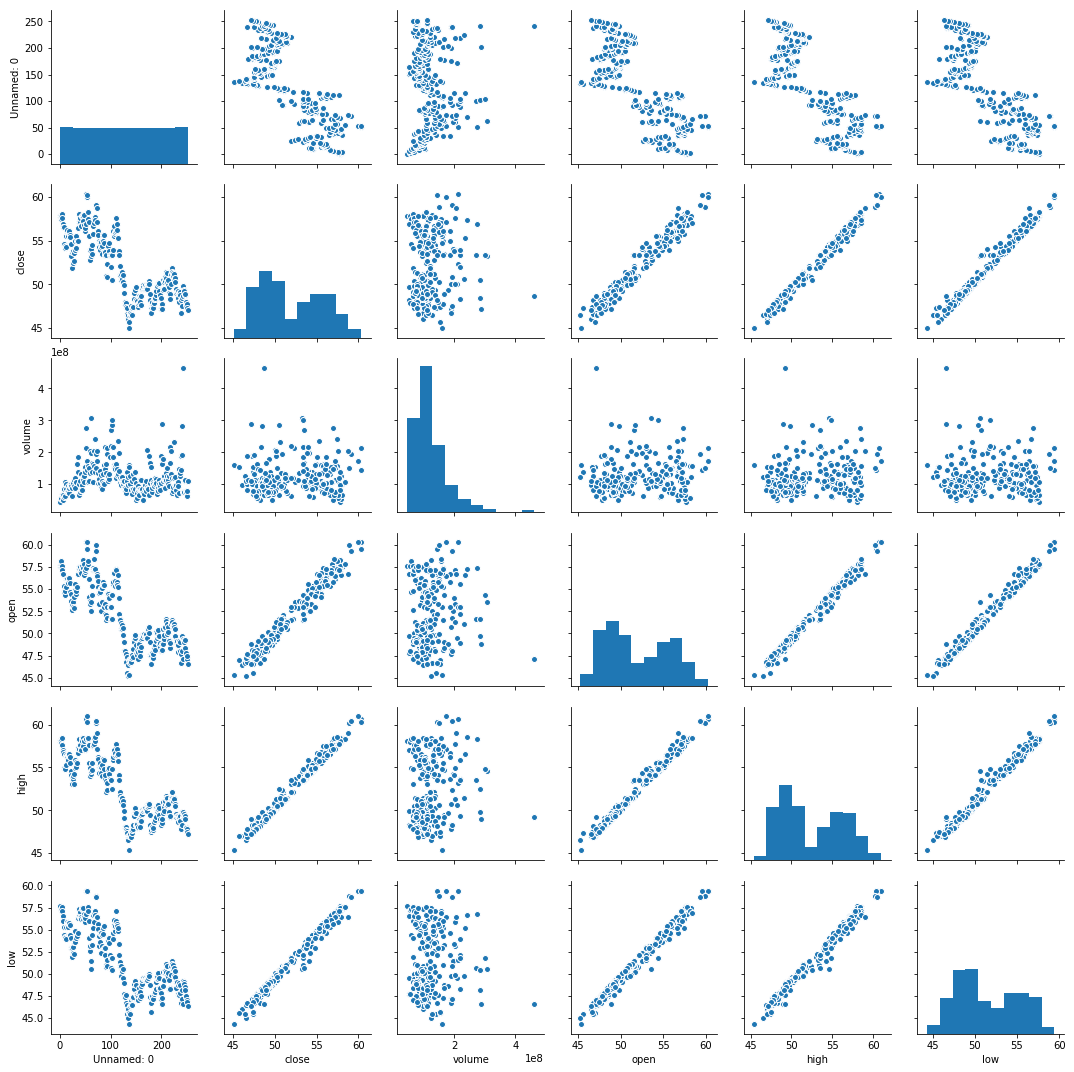

In [6]:
%matplotlib inline
sns.pairplot(APPLE11)

In [65]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input,LSTM
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(7)
window=1
data=pd.Series(np.array(APPLE11.open),index=APPLE11.date)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
X_train,X_test=train_test_split(data[:-window],train_size=0.7)
y_train,y_test=train_test_split(data[window:],train_size=0.7)

C:\Users\Asus\AppData\Roaming\Python\Python35\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Asus\AppData\Roaming\Python\Python35\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [67]:
X_train=np.reshape(X_train,(X_train.shape[0],1,1))
y_train=np.reshape(y_train,(y_train.shape[0],1,1))

In [68]:
model = Sequential()
model.add(LSTM(4, input_shape=(1,window)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

ValueError: Error when checking target: expected dense_19 to have 2 dimensions, but got array with shape (175, 1, 1)

In [8]:

window=21
model=Sequential()
model.add(Dense(window,activation='relu',input_shape=(window,)))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
X_train=[]
y_train=[]
for i in range(11):
    X_train.append(np.array(APPLE11[APPLE11.columns[2:]][i*window:(i+1)*window]))
    y_train.append(np.array(APPLE11[APPLE11.columns[2:]][(i+1)*window:(i+2)*window]))


history=model.fit(X_train[0],y_train[0])

NameError: name 'dataset' is not defined